# Stacking

What we going to learn from this lab:

1. Stacking is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models.
2. The scikit-learn library provides a standard implementation of the stacking ensemble in Python.
3. How to use stacking ensembles for regression and classification predictive modeling.

Before we go start the lab session

1. Can I selects different algithms for different base models?
2. All models run in parallel or in sequetial in time?


Import all the necessary libraries

In [18]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#stacking claasifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

1.0.2


First we will see how indivisula models we are considering is performing on the given data set. Towards this we follow the below steps.

1. Generate the dataset (using make_classification)
2. Prepare the list of models we want to use as base 0 model.
3. Evaluate the models individually

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.052)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


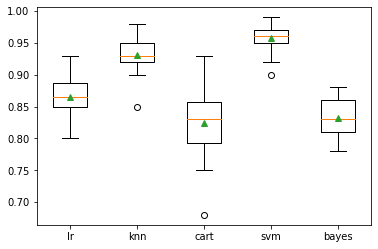

In [19]:



# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models_1():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models_1()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We see that SVM has superior performance over all other models for this dataset.

### Introducing  Stacking

We have selected Logistic regression as Base 1 model.

The  Base 0 models are

1. Logistic regression
2. KNN
3. Decisison tree
4. SVC
5. Bayes

In [20]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [21]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.019)


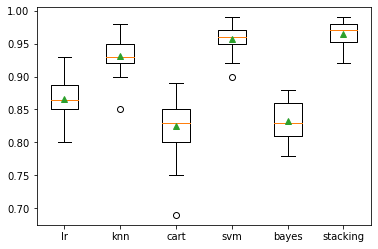

In [22]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Summary:

1. We have implemented stacking and observed that the ensemble model has better performance than the indivisual models

Todo:

Try different models for base 1 and observe the performance